# 통신사 데이터를 활용한 고객 이탈 예측 및 맞춤형 서비스 제공을 통한 이탈율 감소

## 0. 통신사 비즈니스에 대한 이해
- 통신사 비즈니스에서 가장 중요한 것은 고객 유치와 유지입니다. 이를 위해 통신사는 다양한 마케팅 전략을 활용하며,\
 고객의 만족도를 높이는 방안을 모색합니다. 하지만, 고객 이탈은 통신사에게 큰 손실로 이어질 수 있기 때문에\
  이탈 고객을 예측하여 사전에 대처할 수 있도록 대응하는 것이 중요합니다.

- 또한, 통신사 비즈니스에서는 고객 데이터의 활용이 매우 중요합니다. 고객의 이용 패턴을 분석하여 \
개인 맞춤형 서비스를 제공하거나, 고객의 이탈 여부를 예측하는 모델을 구축하여 이탈률을 낮추는 등 \
다양한 분석을 수행합니다. 따라서, 데이터를 정확하게 수집하고 분석하는 것은 통신사 비즈니스에 있어서 매우 중요한 역할을 합니다.

## 1. 문제정의
- 고객의 서비스 이용 패턴과 소비심리를 분석하여, 고객의 이탈 가능성을 예측하고 그에 맞는 \
맞춤형 서비스를 제공하여 고객 이탈률을 낮추는 방안을 모색하고자 합니다. \
이를 위해 Telecom Churn Rate Dataset을 활용하여 고객들을 세분화하고, \
번들 판매를 분석하여 각 고객에게 맞는 최적의 서비스 패키지를 제공하여 \
고객은 조금 더 만족스러운 서비스를 제공받으며, 회사는 이익을 극대화 할 수 있을 것입니다.

## 2. 데이터 수집

### 2.1 출처 및 데이터 소개

출처 : [캐글 Telecom Company Churn Rate](https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data)

- customerID: 고객 식별번호
- gender: 고객 성별
- SeniorCitizen: 노년 고객 여부 (1: 노년고객, 0: 노년고객 아님)
- Partner: 고객의 파트너 여부
- Dependents: 고객의 부양가족 여부
- tenure: 고객이 사용한 달 수
- PhoneService: 전화 서비스 사용 여부
- MultipleLines: 다중 전화 회선 사용 여부
- InternetService: 인터넷 서비스 종류
    - Fiber optic: 광섬유 케이블을 사용하여 데이터를 전송하는 기술로 높은 속도와 안정성을 원하는 사용자나 기업들에게 추천
    - DSL: 디지털 가입자 회선(Digital Subscriber Line)의 약어로, 전화선을 이용하여 데이터를 전송하는 기술로 상대적으로 저렴한 비용으로 인터넷을 이용하고자 하는 가정 사용자들에게 추천
- OnlineSecurity: 온라인 보안 여부
- OnlineBackup: 온라인 백업 여부
- DeviceProtection: 기기 보호 여부
- TechSupport: 기술 지원 여부
- StreamingTV: 스트리밍 TV 사용 여부
- StreamingMovies: 스트리밍 영화 사용 여부
- Contract: 계약 기간
- PaperlessBilling: 종이 청구서 수신 여부
- PaymentMethod: 결제 수단
- MonthlyCharges: 월별 요금
- TotalCharges: 총 요금
- numAdminTickets: 관리티켓 갯수
- numTechTickets: 기술티켓 갯수
- Churn: 이탈 여부 (Yes: 이탈, No: 이탈하지 않음)

### 2.2 필요한 라이브러리 import

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import optuna
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

colors = ['#FF7F50', '#87CEFA', '#DA70D6', '#32CD32', '#FFD700', 
          '#40E0D0', '#FF69B4', '#BA55D3', '#808080', '#FFB6C1']

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
set_seed(42)
   

## 3. 데이터 전처리

In [2]:
df = pd.read_excel('Telecom Churn Rate Dataset.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes



- 위의 요약 통계를 통해서 TotalCharges의 경우 숫자형 데이터인데 object로 표현되어 있고 타입변경이 바로 되지 않아 데이터에 오류가 있음을 확인할 수 있습니다.
####

In [3]:
# TotalCharges 컬럼에서 공백을 null 값으로 변환하기
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

# TotalCharges 컬럼의 데이터 타입을 float으로 변환하기
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# 결측치 확인
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


## 4. 탐색적 데이터 분석

### 4.1 수치형 데이터의 통계 및 시각화

In [5]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


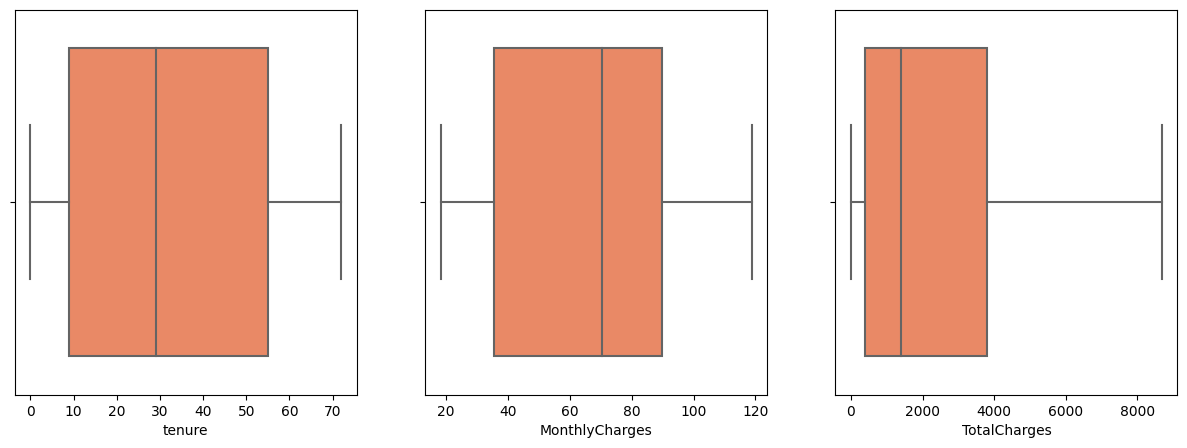

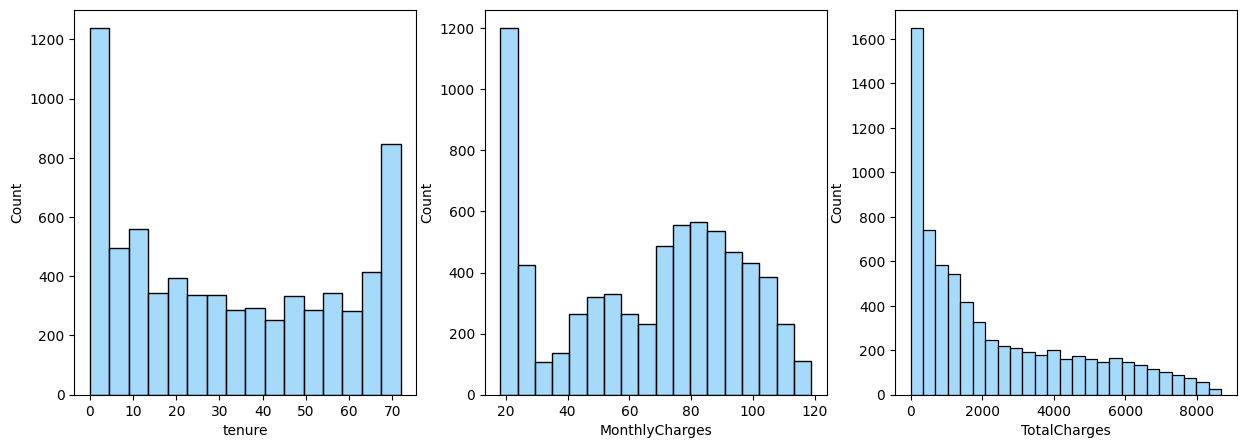

In [6]:
# boxplot 그리기
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.boxplot(x=df['tenure'], ax=axs[0], color=colors[0])
sns.boxplot(x=df['MonthlyCharges'], ax=axs[1],color=colors[0])
sns.boxplot(x=df['TotalCharges'], ax=axs[2],color=colors[0])
plt.show()

# histogram 그리기
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(x=df['tenure'], ax=axs[0],color=colors[1])
sns.histplot(x=df['MonthlyCharges'], ax=axs[1],color=colors[1])
sns.histplot(x=df['TotalCharges'], ax=axs[2],color=colors[1])
plt.show()


- tenure 막대그래프에서 이용기간이 길어질수록 하락하는 추세였으나 70의 경우에는 count 가 크게 증가하여 이에 대한 확인이 필요해보입니다.
####



### 4.2 tenure가 70 이상인 서비스들의 시각화

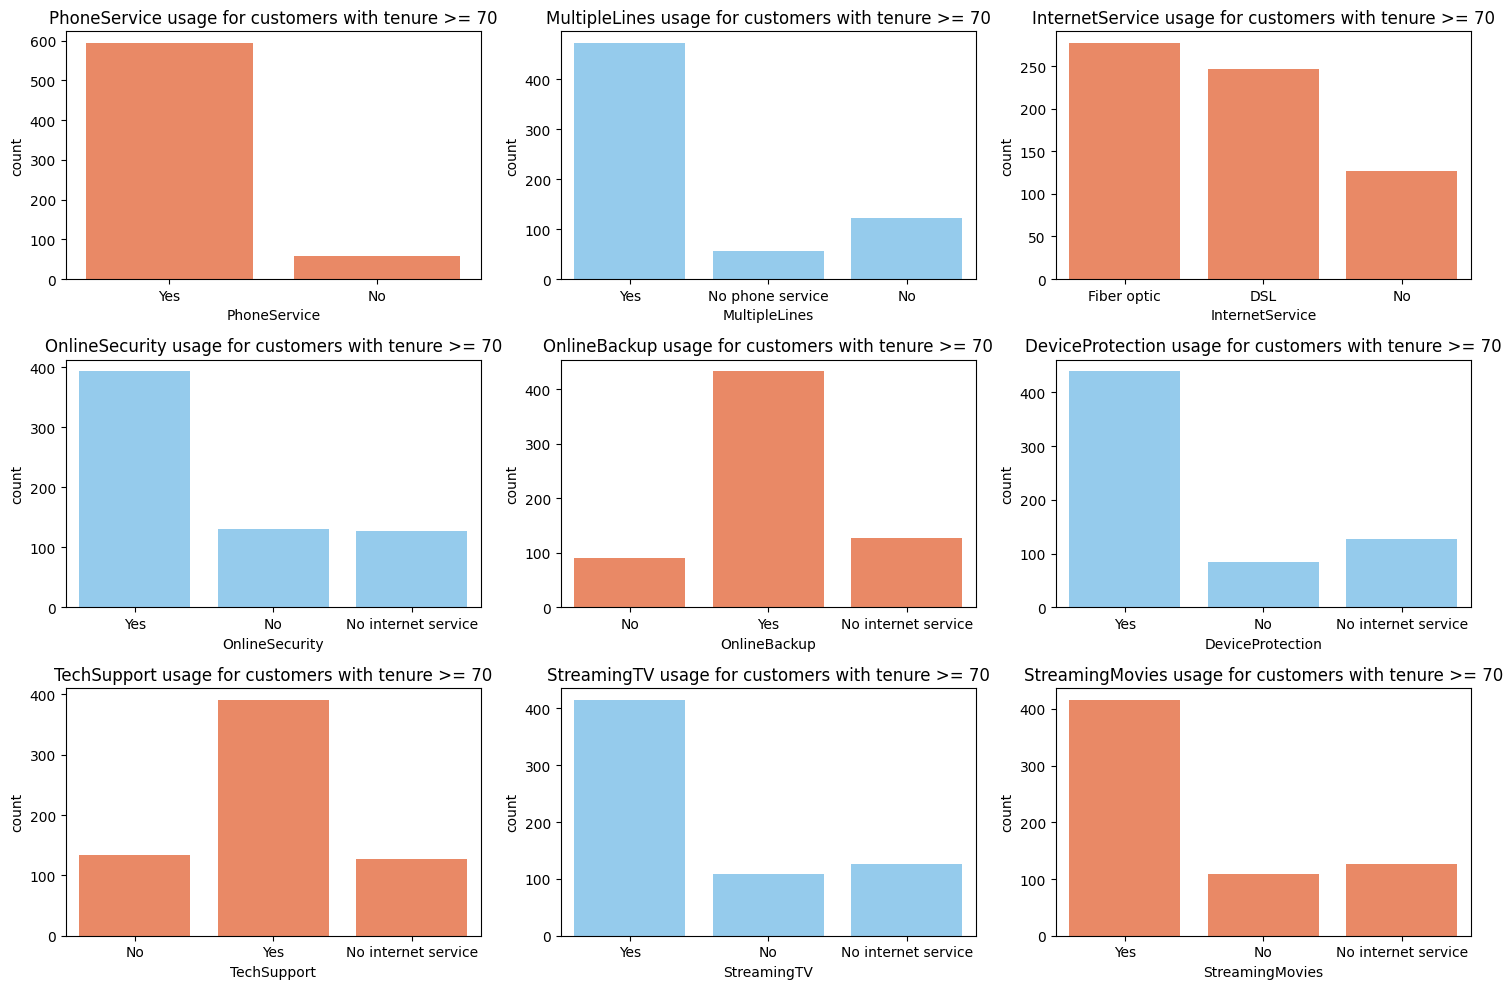

In [7]:
services=['PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies']

plt.figure(figsize=(15,10))
for i, service in enumerate(services):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df[df['tenure'] >= 70], x=service, color=colors[i%2])
    plt.title(f'{service} usage for customers with tenure >= 70')
plt.tight_layout()
plt.show()


- 사용기간이 70개월 이상인 고객의 경우 거의 모든 서비스를 사용중임을 알 수 있습니다.
####

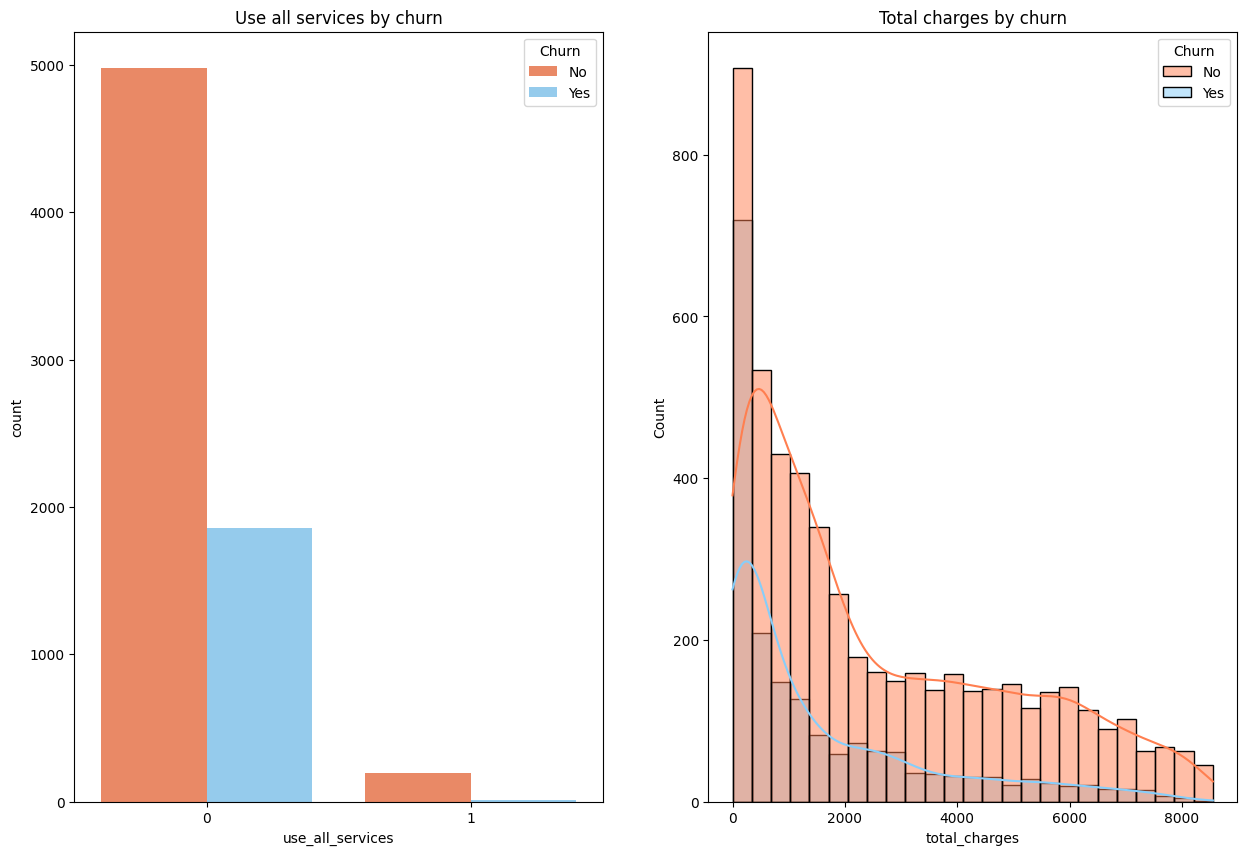

In [8]:
# use_all_services 피처 생성
df['use_all_services'] = np.where((df['PhoneService'] == 'Yes') & 
                                  (df['MultipleLines'] == 'Yes') & 
                                  (df['InternetService'] != 'No') & 
                                  (df['OnlineSecurity'] == 'Yes') & 
                                  (df['OnlineBackup'] == 'Yes') & 
                                  (df['DeviceProtection'] == 'Yes') & 
                                  (df['TechSupport'] == 'Yes') & 
                                  (df['StreamingTV'] == 'Yes') & 
                                  (df['StreamingMovies'] == 'Yes'), 1, 0)


# total_charges 피처 생성
df['total_charges'] = df['tenure'] * df['MonthlyCharges']

# use_all_services 피처와 이탈 여부 관계 시각화 & total_charges와 이탈 여부 관계 시각화
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='use_all_services', hue='Churn', palette=colors)
plt.title('Use all services by churn')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_charges', hue='Churn', kde=True, palette=colors )
plt.title('Total charges by churn')
plt.show()


####

### 4.3 이탈/비이탈 고객 비율 확인

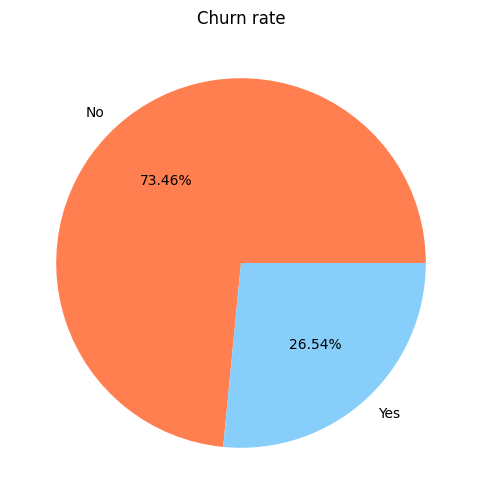

In [9]:
plt.figure(figsize=(8,6))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.2f%%', colors=colors)
plt.title('Churn rate')
plt.show()


- 이탈률은 26.54% 이고, 비이탈/이탈 비율이 약 3:1 정도로 데이터가 불균등함을 확인할 수 있습니다.
####

### 4.4 월별 요금 분포 확인 & 사용 기간 분포 확인

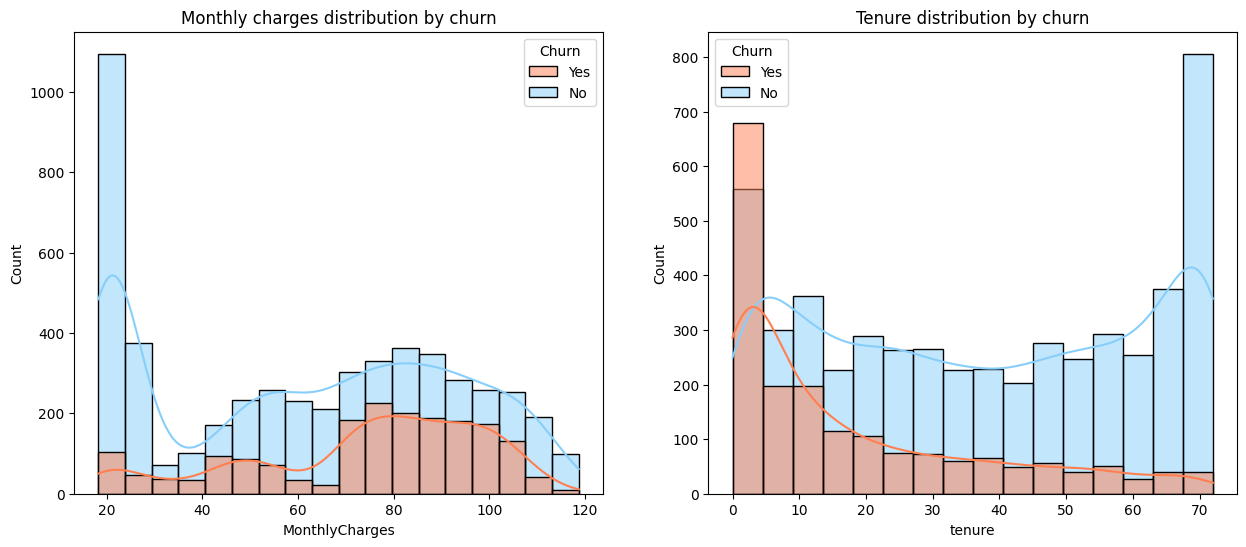

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette = colors, hue_order=['Yes', 'No'])
plt.title('Monthly charges distribution by churn')
plt.subplot(1,2,2)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True,  palette = colors, hue_order=['Yes', 'No'])
plt.title('Tenure distribution by churn')
plt.show()

- 월별 요금이 60을 넘어가면서 이탈하는 수가 확연히 증가하는 것을 알 수 있고, 가입 후 초기 약 5개월을 전후로 이탈하는 수가 확연히 감소함을 알 수 있습니다.
- 따라서, 여러 서비스들을 조합하여 전체 요금이 60 이내인 서비스를 출시하고, 가입 후 약 5개월간 고객을 유지하는 것이 이탈을 방지하는데 관건으로 보입니다.
####

### 4.5 고객의 성별, 파트너, 부양가족 여부별 이탈 여부 확인

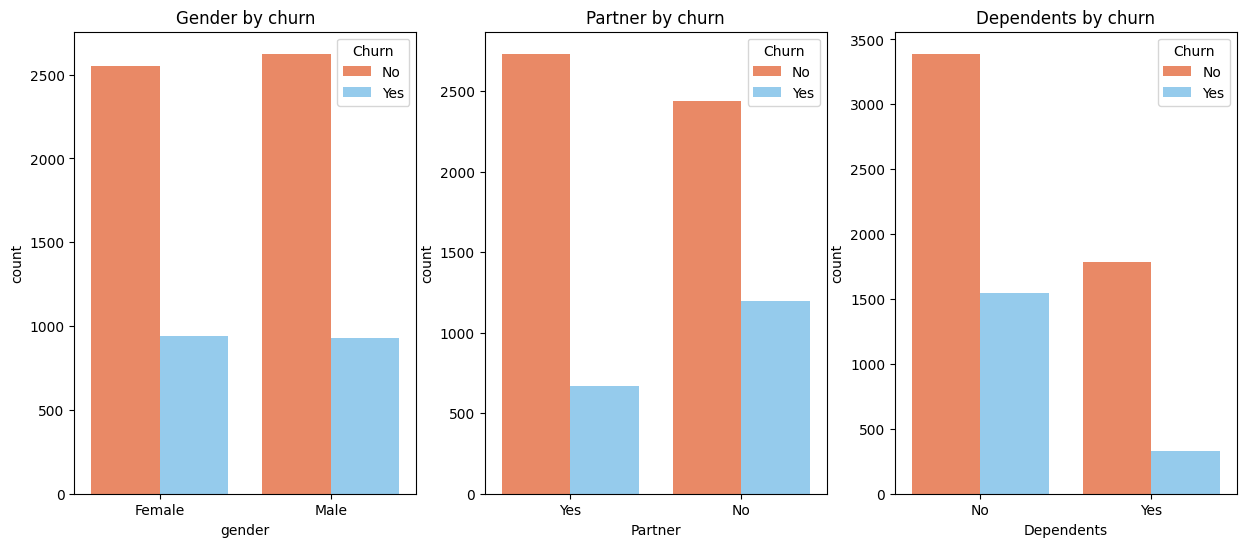

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data=df, x='gender', hue='Churn', palette = colors)
plt.title('Gender by churn')
plt.subplot(1,3,2)
sns.countplot(data=df, x='Partner', hue='Churn', palette = colors)
plt.title('Partner by churn')
plt.subplot(1,3,3)
sns.countplot(data=df, x='Dependents', hue='Churn', palette = colors)
plt.title('Dependents by churn')
plt.show()

- 성별이 이탈 수에 미치는 영향은 거의 없어보이며, partner와 dependents의 존재여부에 따라서 이탈 수에 유의미한 영향을 미치는 것으로 보입니다. 
####

### 4.6 고객의 이용 서비스별 이탈 여부 확인

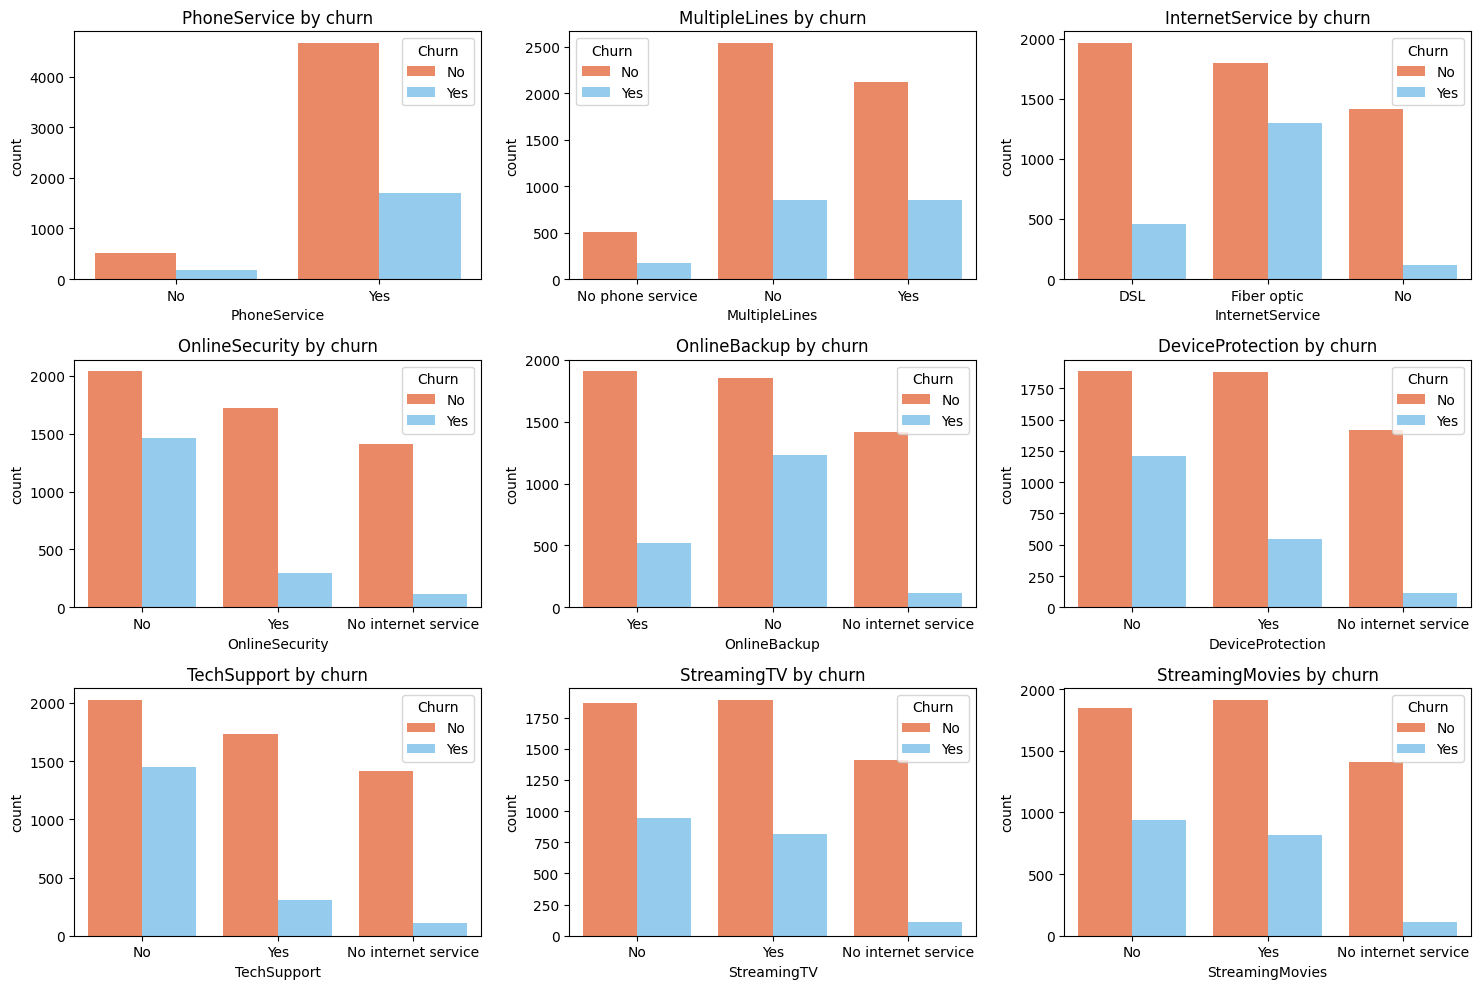

In [12]:

plt.figure(figsize=(15,10))
for i, service in enumerate(services):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=service, hue='Churn', palette = colors)
    plt.title(f'{service} by churn')
plt.tight_layout()
plt.show()

- 인터넷 서비스의 'Fiber optic' 을 사용할 경우 이탈 수가 확연히 높은 것을 알 수 있습니다.
- 인터넷 서비스 중에서 OnlineSecurity, OnlineBackup, DeviceProtention, TechSupport 서비스들을 사용할 경우 \
    이탈 수가 StreamingTV, StreamingMovices 보다 확연히 적은 것을 알 수 있습니다.
    ####

### 4.7 결제 방법별 이탈 여부 확인

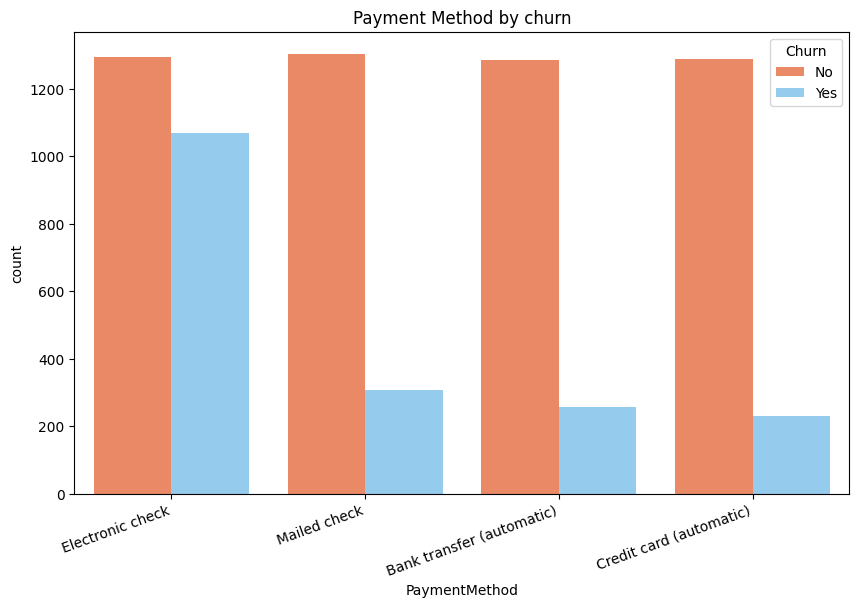

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette = colors)
plt.xticks(rotation=20, ha='right')
plt.title('Payment Method by churn')
plt.show()

- electronic check(전자수표)의 경우 mailed check(종이수표), bank transfer(auto), credit card(auto) 보다 상당히 높은 이탈수를 보입니다. \
electronic check의 경우 다른 결제수단에 비해 복잡한 절차로 인해 불편함을 야기하기에 상대적으로 이탈 수가 많은 것으로 판단됩니다.
####


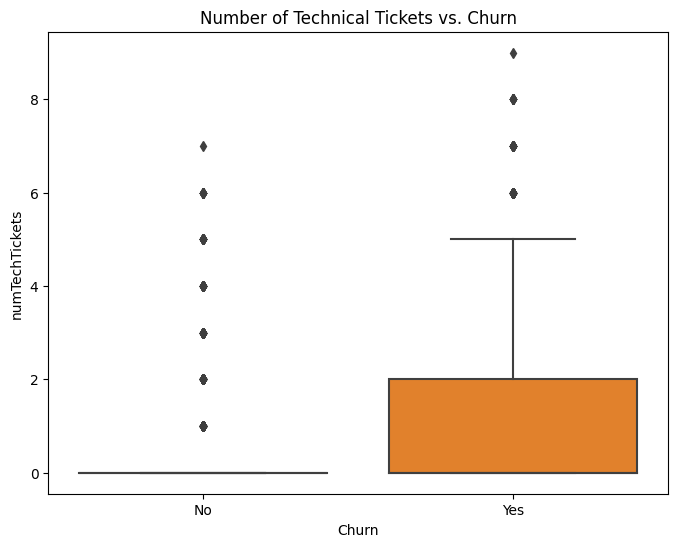

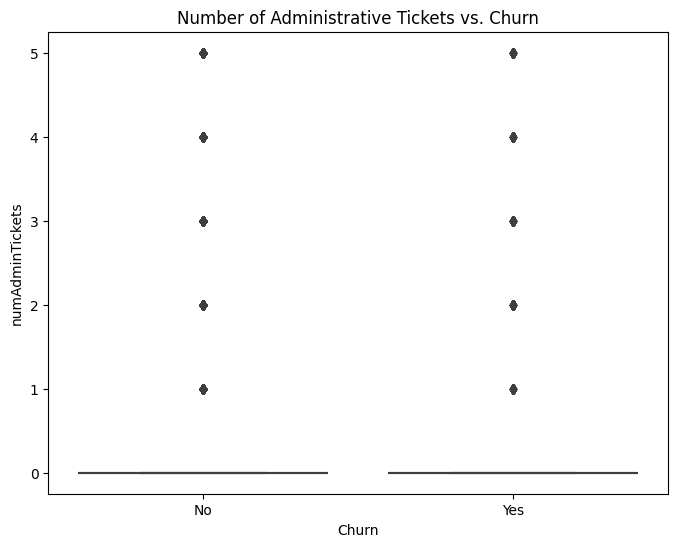

In [14]:
# 이탈한 고객과 이탈하지 않은 고객의 기술티켓 갯수 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='numTechTickets', data=df)
plt.title('Number of Technical Tickets vs. Churn')
plt.show()

# 이탈한 고객과 이탈하지 않은 고객의 관리티켓 갯수 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='numAdminTickets', data=df)
plt.title('Number of Administrative Tickets vs. Churn')
plt.show()

## 5. 서비스별 대략적인 가격 계산

### 5.1 통신사에서 제공하는 서비스별 가격 계산

In [15]:
services.append('MonthlyCharges')
service_df = df[services]

phone_service_price = service_df[(service_df['PhoneService'] == 'Yes') & \
            (service_df['MultipleLines'] == 'No') & \
            (service_df['InternetService'] == 'No') & \
            (service_df['OnlineSecurity'].str.contains('No')) & \
            (service_df['OnlineBackup'].str.contains('No')) & \
            (service_df['DeviceProtection'].str.contains('No')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean()

multiple_lines_price = service_df[(service_df['PhoneService'] == 'Yes') & \
            (service_df['MultipleLines'] == 'Yes') & \
            (service_df['InternetService'] == 'No') & \
            (service_df['OnlineSecurity'].str.contains('No')) & \
            (service_df['OnlineBackup'].str.contains('No')) & \
            (service_df['DeviceProtection'].str.contains('No')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - phone_service_price

fiber_price = service_df[(service_df['PhoneService'] == 'Yes') & \
            (service_df['MultipleLines'] == 'Yes') & \
            (service_df['InternetService'] == 'Fiber optic') & \
            (service_df['OnlineSecurity'].str.contains('No')) & \
            (service_df['OnlineBackup'].str.contains('No')) & \
            (service_df['DeviceProtection'].str.contains('No')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - phone_service_price- multiple_lines_price


dsl_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('No')) & \
            (service_df['OnlineBackup'].str.contains('No')) & \
            (service_df['DeviceProtection'].str.contains('No')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean()

online_security_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('Yes')) & \
            (service_df['OnlineBackup'].str.contains('No')) & \
            (service_df['DeviceProtection'].str.contains('No')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - dsl_price

online_backup_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('Yes')) & \
            (service_df['OnlineBackup'].str.contains('Yes')) & \
            (service_df['DeviceProtection'].str.contains('No')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - dsl_price -online_security_price

device_protection_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('Yes')) & \
            (service_df['OnlineBackup'].str.contains('Yes')) & \
            (service_df['DeviceProtection'].str.contains('Yes')) & \
            (service_df['TechSupport'].str.contains('No')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - dsl_price -online_security_price - online_backup_price

tech_support_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('Yes')) & \
            (service_df['OnlineBackup'].str.contains('Yes')) & \
            (service_df['DeviceProtection'].str.contains('Yes')) & \
            (service_df['TechSupport'].str.contains('Yes')) & \
            (service_df['StreamingTV'].str.contains('No')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - dsl_price -online_security_price - online_backup_price - device_protection_price

streaming_tv_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('Yes')) & \
            (service_df['OnlineBackup'].str.contains('Yes')) & \
            (service_df['DeviceProtection'].str.contains('Yes')) & \
            (service_df['TechSupport'].str.contains('Yes')) & \
            (service_df['StreamingTV'].str.contains('Yes')) & \
            (service_df['StreamingMovies'].str.contains('No')) 
           ]['MonthlyCharges'].mean() - dsl_price -online_security_price - online_backup_price - device_protection_price - tech_support_price

streaming_movies_price = service_df[(service_df['PhoneService'] == 'No') & \
            (service_df['MultipleLines'] == 'No phone service') & \
            (service_df['InternetService'] == 'DSL') & \
            (service_df['OnlineSecurity'].str.contains('Yes')) & \
            (service_df['OnlineBackup'].str.contains('Yes')) & \
            (service_df['DeviceProtection'].str.contains('Yes')) & \
            (service_df['TechSupport'].str.contains('Yes')) & \
            (service_df['StreamingTV'].str.contains('Yes')) & \
            (service_df['StreamingMovies'].str.contains('Yes')) 
           ]['MonthlyCharges'].mean() - dsl_price -online_security_price - online_backup_price - device_protection_price - tech_support_price - streaming_tv_price

In [16]:
print('PhoneService Price:', phone_service_price)
print('MultipleLines Price:', multiple_lines_price)
print('Fiber Price:', fiber_price)
print('DSL Price:', dsl_price)
print('OnlineSecurity Price:', online_security_price)
print('OnlineBackup Price:', online_backup_price)
print('DeviceProtection Price:', device_protection_price)
print('TechSupport Price:', tech_support_price)
print('StreamingTV Price:', streaming_tv_price)
print('StreamingMovies Price:', streaming_movies_price)

PhoneService Price: 19.95515202702703
MultipleLines Price: 5.015462008060691
Fiber Price: 49.939626928767694
DSL Price: 24.903750000000002
OnlineSecurity Price: 5.041488095238094
OnlineBackup Price: 4.838095238095235
DeviceProtection Price: 5.611666666666672
TechSupport Price: 4.9424999999999955
StreamingTV Price: 9.337500000000006
StreamingMovies Price: 10.17499999999999


### 5.2 서비스별 예측가격을 바탕으로 월별금액 재계산

In [17]:
def calculate_monthly_charges(row):
    total_price=0
    total_price+=phone_service_price if row['PhoneService'] == 'Yes' else 0
    total_price+=multiple_lines_price if row['MultipleLines'] == 'Yes' else 0
    total_price+=fiber_price if row['InternetService'] == 'Fiber optic' else 0
    total_price+=dsl_price if row['InternetService'] == 'DSL' else 0
    total_price+=online_security_price if row['OnlineSecurity'] == 'Yes' else 0
    total_price+=online_backup_price if row['OnlineBackup'] == 'Yes' else 0
    total_price+=device_protection_price if row['DeviceProtection'] == 'Yes' else 0
    total_price+=tech_support_price if row['TechSupport'] == 'Yes' else 0
    total_price+=streaming_tv_price if row['StreamingTV'] == 'Yes' else 0
    total_price+=streaming_movies_price if row['StreamingMovies'] == 'Yes' else 0
    return total_price

service_df['MonthlyCharges_pred'] = service_df.apply(calculate_monthly_charges, axis=1)


In [18]:
service_df.describe()

,MonthlyCharges,MonthlyCharges_pred
count,7043.000000,7043.000000
mean,64.761692,64.665606
std,30.090047,30.018412
min,18.250000,19.955152
25%,35.500000,35.078750
50%,70.350000,69.894779
75%,89.850000,89.820614
max,118.750000,114.856491


In [19]:
from scipy.stats import ttest_ind

t, p = ttest_ind(service_df['MonthlyCharges'], service_df['MonthlyCharges_pred'])
print("t-score: {:.2f}, p-value: {:.3f}".format(t, p))



t-score: 0.19, p-value: 0.850


- t-score가 0.19으로 매우 작기 때문에 평균값 차이가 크게 유의미하지 않다고 판단할 수 있고,\
p-value는 0.85로 매우 높은 값이며, 차이가 우연히 발생할 가능성이 매우 높다는 것이므로 \
MonthlyCharges와 MonthlyCharges_pred는 비슷하다고 볼 수 있습니다
- 즉, 앞에서 계산한 각 서비스들의 가격을 그대로 사용하는데 문제가 없어보입니다.

#### 5.3 회계적인 관점에서의 핵심서비스

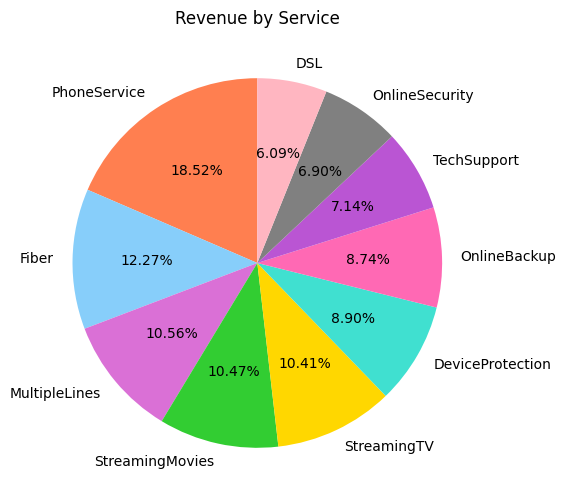

In [20]:
# 각 서비스별 매출 계산
phone_revenue = df[df['PhoneService'] == 'Yes']['MonthlyCharges'].sum() * 12
multiplelines_revenue = df[df['MultipleLines'] == 'Yes']['MonthlyCharges'].sum() * 12
fiber_revenue = df[df['InternetService'] == 'Fiber optic']['MonthlyCharges'].sum() * 12
dsl_revenue = df[df['InternetService'] == 'DSL']['MonthlyCharges'].sum() * 12
onlinesecurity_revenue = df[df['OnlineSecurity'] == 'Yes']['MonthlyCharges'].sum() * 12
onlinebackup_revenue = df[df['OnlineBackup'] == 'Yes']['MonthlyCharges'].sum() * 12
deviceprotection_revenue = df[df['DeviceProtection'] == 'Yes']['MonthlyCharges'].sum() * 12
techsupport_revenue = df[df['TechSupport'] == 'Yes']['MonthlyCharges'].sum() * 12
streamingtv_revenue = df[df['StreamingTV'] == 'Yes']['MonthlyCharges'].sum() * 12
streamingmovies_revenue = df[df['StreamingMovies'] == 'Yes']['MonthlyCharges'].sum() * 12

# 각 서비스별 매출 합산
revenue_dict = {'PhoneService': phone_revenue,
                'MultipleLines': multiplelines_revenue,
                'Fiber': fiber_revenue,
                'DSL': dsl_revenue,
                'OnlineSecurity': onlinesecurity_revenue,
                'OnlineBackup': onlinebackup_revenue,
                'DeviceProtection': deviceprotection_revenue,
                'TechSupport': techsupport_revenue,
                'StreamingTV': streamingtv_revenue,
                'StreamingMovies': streamingmovies_revenue}

# 매출이 가장 높은 서비스 찾기
sorted_revenue = sorted(revenue_dict.items(), key=lambda x: x[1], reverse=True)


x_labels = [x[0] for x in sorted_revenue]
y_values = [x[1] for x in sorted_revenue]

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(y_values, labels=x_labels, autopct='%1.2f%%', startangle=90, colors = colors)

ax.set_title('Revenue by Service')

plt.show()




- 핵심서비스의 정의를 수익에 가장 큰 기여를 하는 서비스라고 할 경우 \
10%를 기준으로 핵심서비스는 PhoneService, Fiber, MultipleLines, StreamingMovies 가 핵심서비스라고 정의할 수 있습니다.

#### 5.4 머신러닝을 이용한 핵심서비스 정의

X : 9종류의 서비스\
y : MonthlyCharges\
선형회귀모델과, 랜덤포레스트를 이용하여 간단한 모델 생성 후 coef와 feature_importances 확인

In [21]:

# categorical 변수들에 대해 Label Encoding 수행
categorical_data=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod','Churn']
le = LabelEncoder()
df_encode = df.copy(deep=True)
df_encode[categorical_data] = df_encode[categorical_data].apply(lambda x: le.fit_transform(x))

In [22]:

X = df_encode.loc[:,'PhoneService':'StreamingMovies']
y = df_encode['MonthlyCharges']

# 모델 학습
lr = LinearRegression()
lr.fit(X, y)
importances_lr =  lr.coef_
indices_lr = np.argsort(importances_lr) 

rf = RandomForestRegressor()
rf.fit(X, y)
importances =  rf.feature_importances_
indices = np.argsort(importances)  



Text(0.5, 1.0, 'Feature Importances - Random Forest')

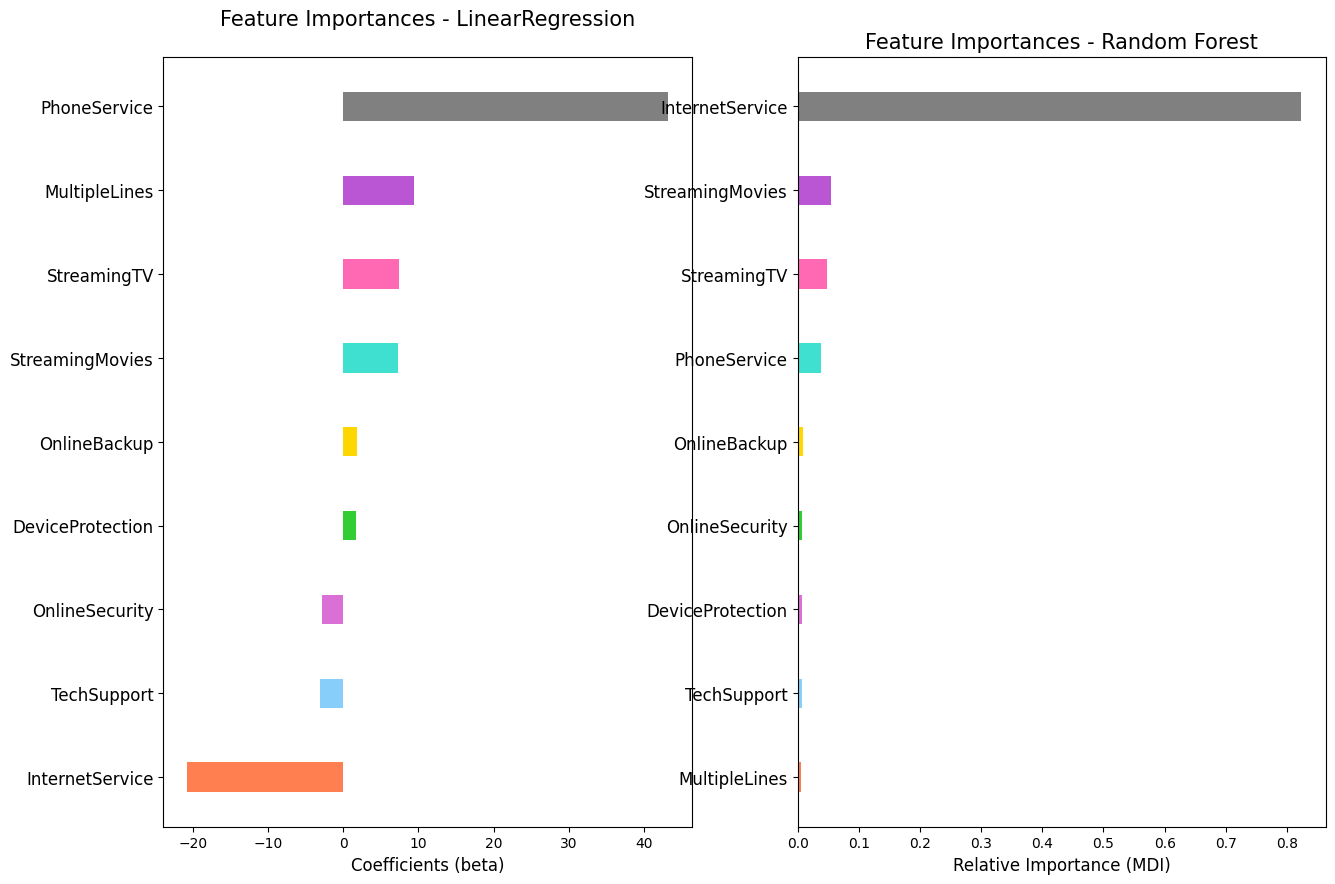

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1) 
plt.barh(X.columns, importances_lr[indices_lr], .35, color=colors, align='center')
plt.yticks(X.columns, X.columns[indices_lr], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - LinearRegression\n', fontsize=15)

plt.subplot(1, 2, 2) 
plt.barh(X.columns, importances[indices], .35, color=colors, align='center')
plt.yticks(X.columns, X.columns[indices], fontsize=12)
plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances - Random Forest', fontsize=15)


## 6. 모델링

### 6.1 전처리

In [24]:
# InternetService의 경우 2가지 서비스를 DSL, Fiber 2개의 열로 변경
df[['DSL', 'Fiber']] = pd.get_dummies(df['InternetService'])[['DSL', 'Fiber optic']]
df=df.drop('InternetService', axis=1)

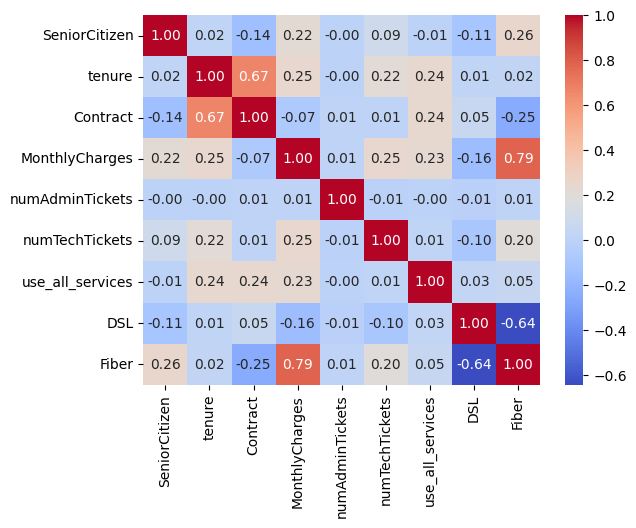

In [25]:
# 계약의 경우 1개월, 12개월, 24개월로 변경
df['Contract'] = df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})
df2=df.drop(columns='TotalCharges',axis=1)
df3=df2.drop(columns='total_charges',axis=1)
corr = df3.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [26]:
X =  df3.drop(['customerID', 'Churn'], axis = 1)
y =  df3['Churn']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,numAdminTickets,numTechTickets,use_all_services,DSL,Fiber
1695,Male,0,Yes,Yes,54,Yes,Yes,No,Yes,No,...,No,12,Yes,Electronic check,70.70,0,0,0,1,0
1095,Male,0,No,No,1,Yes,No,No,No,No,...,No,1,Yes,Electronic check,80.55,0,0,0,0,1
3889,Male,0,No,No,13,Yes,No,No internet service,No internet service,No internet service,...,No internet service,12,No,Credit card (automatic),19.30,0,0,0,0,0
3667,Female,1,Yes,Yes,24,Yes,No,No,No,Yes,...,Yes,24,Yes,Electronic check,96.55,0,0,0,0,1
2902,Female,1,No,No,6,Yes,No,Yes,No,No,...,No,1,Yes,Electronic check,74.10,0,0,0,0,1


### 6.2 범주변수 변환

In [27]:

for col in X.columns:
    if X[col].dtype == 'object':
        le =  LabelEncoder()
        X_train[col] =  le.fit_transform(X_train[col]) 
        X_test[col] =   le.transform(X_test[col]) 
        
        

# # 범주형 변수를 이진 변수로 변환
# X_train = pd.get_dummies(X_train, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
#                                                     'MultipleLines', 'InternetService', 'OnlineSecurity',
#                                                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                                                     'StreamingTV', 'StreamingMovies', 'Contract',
#                                                     'PaperlessBilling', 'PaymentMethod'])

# X_test = pd.get_dummies(X_test, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
#                                                     'MultipleLines', 'InternetService', 'OnlineSecurity',
#                                                     'OnlineBackup', 'DeviceProtection', 'TechSupport',
#                                                     'StreamingTV', 'StreamingMovies', 'Contract',
#                                                     'PaperlessBilling', 'PaymentMethod'])

### 6.3 스케일링

In [28]:

# scaler =  StandardScaler()

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

### 6.4 모든 피처들의 경우의 수를 바탕으로 핵심 Feature 탐색

In [29]:
# from joblib import Parallel, delayed
# import itertools
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from tqdm.auto import tqdm

# # 사용할 피처들
# features = list(X_train_scaled.columns)

# # 모든 피처 조합 생성
# feature_combinations = []
# for i in range(5, len(features) + 1):
#     feature_combinations += list(itertools.combinations(features, i))

# # 모든 피처 조합을 사용해서 모델 학습 및 평가
# def evaluate_model(combination):
#     X_train_selected = X_train_scaled[list(combination)]
#     X_test_selected = X_test_scaled[list(combination)]

#     model = LogisticRegression()
#     model.fit(X_train_selected, y_train)

#     y_pred = model.predict(X_test_selected)
#     score = f1_score(y_test, y_pred, average='macro')
    
#     return (combination, score)


# with Parallel(n_jobs=-1, verbose=0) as parallel:
#     scores = parallel(delayed(evaluate_model)(combination) for combination in tqdm(feature_combinations))

# # 결과를 데이터프레임으로 변환
# result_df = pd.DataFrame(scores, columns=['Features', 'F1 score'])

# # 최적의 피처를 사용한 모델 평가
# best_features = result_df.loc[result_df['F1 score'].idxmax(), 'Features']
# X_train_best = X_train_scaled[list(best_features)]
# X_test_best = X_test_scaled[list(best_features)]

# model = LogisticRegression()
# model.fit(X_train_best, y_train)

# y_pred_best = model.predict(X_test_best)
# report = classification_report(y_test, y_pred_best)
# print(report)
# result_df.to_csv('Features.csv')

In [30]:
result_df=pd.read_csv('Features.csv')
result_df=result_df[['Features','F1 score']]
data=result_df.sort_values(by='F1 score',ascending=False)
data2=data[data['F1 score'] > 0.8]
data2['count']=data2['Features'].apply(lambda x:len(x))
data2['Features']=data2['Features'].apply(lambda x:eval(x))
series_list = list(data2['Features'])
all_elements = [elem for tpl in data2['Features'] for elem in tpl]
counter = Counter(all_elements)
data_sorted=sorted(dict(counter).items(), key=lambda x:x[1],reverse=True)




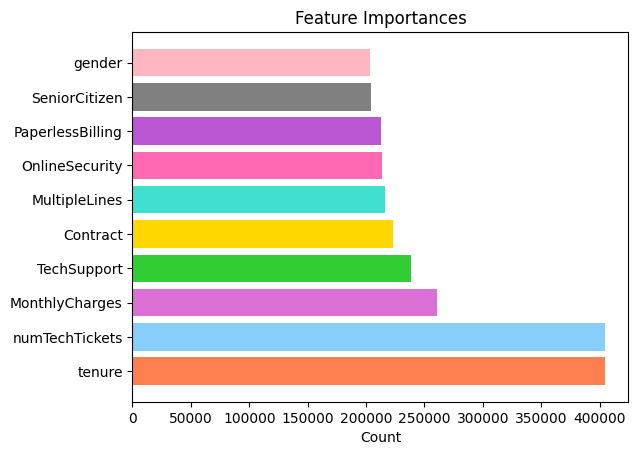

In [31]:
labels = [item[0] for item in data_sorted[0:10]]
values = [item[1] for item in data_sorted[0:10]]
plt.barh(labels, values, color=colors,)
plt.title("Feature Importances")
plt.xlabel("Count")
plt.show()

### 6.5 LogisticRegression의 하이퍼파라미터 튜닝 및 classification_report

In [32]:
# 불균형 데이터이기 때문에 파라미터에 'class_weight': 'balanced' 추가하였고, 교차검증은 StratifiedKFold을 사용함 

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e3)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    model = LogisticRegression(C=C, penalty=penalty, solver=solver, class_weight='balanced')

    cv = StratifiedKFold(n_splits=5)
    scorer = make_scorer(f1_score, average='macro')
    score = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=scorer, n_jobs=-1)
    return score.mean()

study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=10, show_progress_bar=True)
best_params = study.best_params
lr = LogisticRegression(**best_params, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))


[I 2023-04-01 22:11:37,203] A new study created in memory with name: no-name-39bd612b-cedb-4485-b1e8-44d9a749c82a


  0%|          | 0/10 [00:00<?, ?it/s]

/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-04-01 22:11:39,261] Trial 0 finished with value: 0.7910516553087321 and parameters: {'C': 5.522333254088958, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.7910516553087321.
[I 2023-04-01 22:11:42,537] Trial 1 finished with value: 0.7898581645553272 and parameters: {'C': 36.312575371002815, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7910516553087321.
[I 2023-04-01 22:11:43,176] Trial 2 finished with value: 0.7679022813071803 and parameters: {'C': 0.10399773169281112, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7910516553087321.
[I 2023-04-01 22:11:43,230] Trial 3 finished with value: 0.7135871364459865 and parameters: {'C': 0.009567176195399624, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7910516553087321.


/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-04-01 22:11:43,423] Trial 4 finished with value: 0.7923881024166292 and parameters: {'C': 10.55875615278863, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 4 with value: 0.7923881024166292.
[I 2023-04-01 22:11:43,477] Trial 5 finished with value: 0.7895167239985925 and parameters: {'C': 536.2611654826765, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 4 with value: 0.7923881024166292.
[I 2023-04-01 22:11:43,528] Trial 6 finished with value: 0.7752964406135693 and parameters: {'C': 0.14530898677083154, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 4 with value: 0.7923881024166292.
[I 2023-04-01 22:11:43,595] Trial 7 finished with value: 0.7817346119421492 and parameters: {'C': 0.34171958509099926, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 4 with value: 0.7923881024166292.
[I 2023-04-01 22:11:43,656] Trial 8 finished with value: 0.7898320200662448 and parameters: {'C': 0.19091971853638948, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 4 with value: 0.79

/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dahy/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[I 2023-04-01 22:11:43,868] Trial 9 finished with value: 0.7921907435435035 and parameters: {'C': 16.047565195927646, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 4 with value: 0.7923881024166292.
              precision    recall  f1-score   support

          No       0.95      0.80      0.87      1539
         Yes       0.63      0.90      0.74       574

    accuracy                           0.83      2113
   macro avg       0.79      0.85      0.81      2113
weighted avg       0.87      0.83      0.84      2113



Text(0.5, 1.0, 'Feature Importances - LogisticRegression')

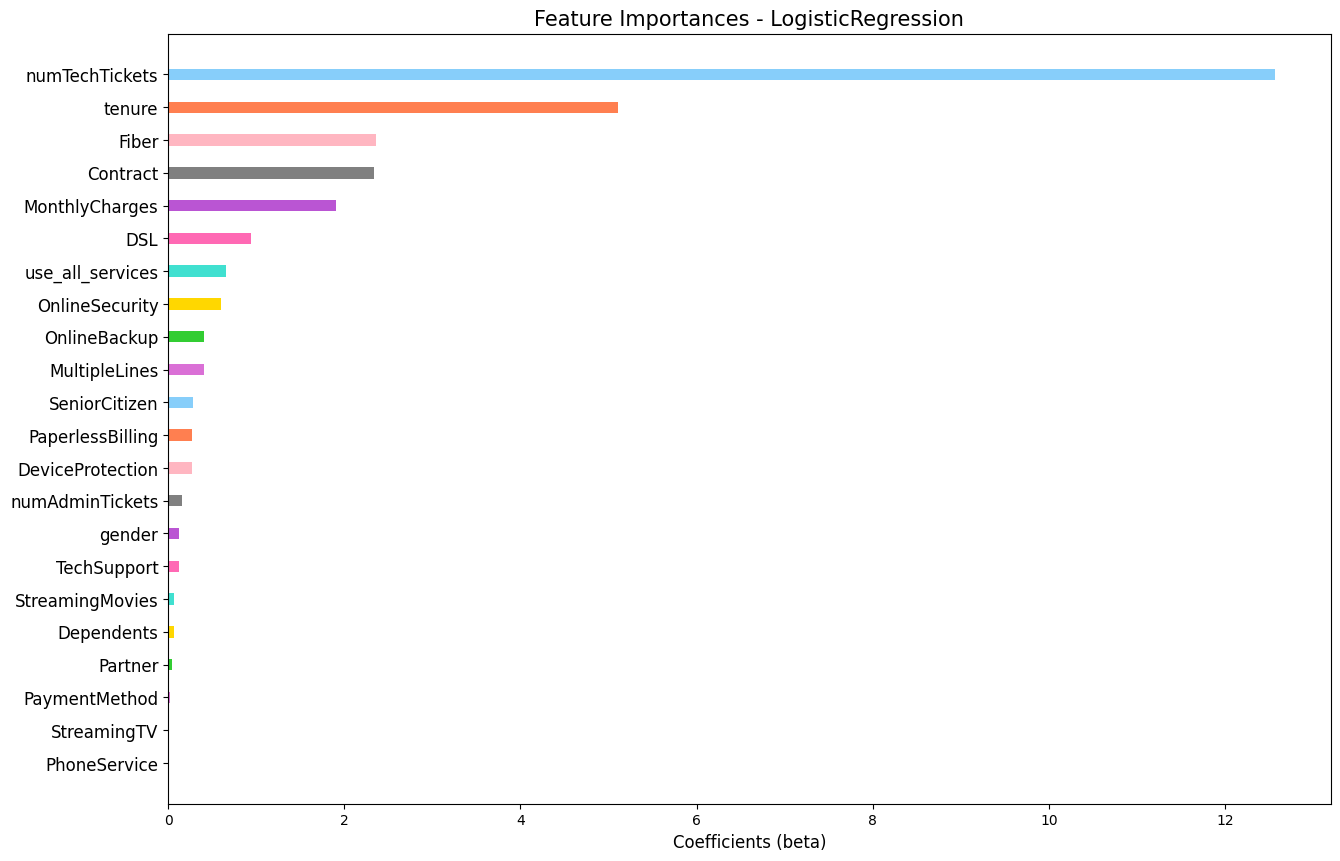

In [33]:
importances_lr = abs(lr.coef_[0])
indices_lr = np.argsort(importances_lr) 
 
plt.figure(figsize=(15,10))
plt.barh(X_train_scaled.columns, importances_lr[indices_lr], .35, color=colors, align='center')
plt.yticks(X_train_scaled.columns, X_train_scaled.columns[indices_lr], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - LogisticRegression', fontsize=15)


### 6.6 RandomForestClassifier의 하이퍼파라미터 튜닝 및 classification_report

In [34]:
# 불균형 데이터이기 때문에 파라미터에 'class_weight': 'balanced' 추가하였고, 교차검증은 StratifiedKFold을 사용함 
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 20, step=2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)

    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf,
                                 class_weight='balanced'
                                )

    scorer = make_scorer(f1_score, average='macro')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring=scorer, n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=10, show_progress_bar=True)
best_params = study.best_params
model = RandomForestClassifier(**best_params, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred_rf = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))



[I 2023-04-01 22:11:44,796] A new study created in memory with name: no-name-1484d148-efc5-4b36-bbc3-295592a11ed8


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2023-04-01 22:11:46,598] Trial 0 finished with value: 0.747671662454542 and parameters: {'n_estimators': 700, 'max_depth': 3, 'min_samples_split': 93, 'min_samples_leaf': 23}. Best is trial 0 with value: 0.747671662454542.
[I 2023-04-01 22:11:46,982] Trial 1 finished with value: 0.7631040059945781 and parameters: {'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 41, 'min_samples_leaf': 92}. Best is trial 1 with value: 0.7631040059945781.
[I 2023-04-01 22:11:49,232] Trial 2 finished with value: 0.7442710988057143 and parameters: {'n_estimators': 900, 'max_depth': 3, 'min_samples_split': 69, 'min_samples_leaf': 67}. Best is trial 1 with value: 0.7631040059945781.
[I 2023-04-01 22:11:49,870] Trial 3 finished with value: 0.7950670477367956 and parameters: {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 18}. Best is trial 3 with value: 0.7950670477367956.
[I 2023-04-01 22:11:52,769] Trial 4 finished with value: 0.7767485201266189 and parameters

Text(0.5, 1.0, 'Feature Importances - Random Forest')

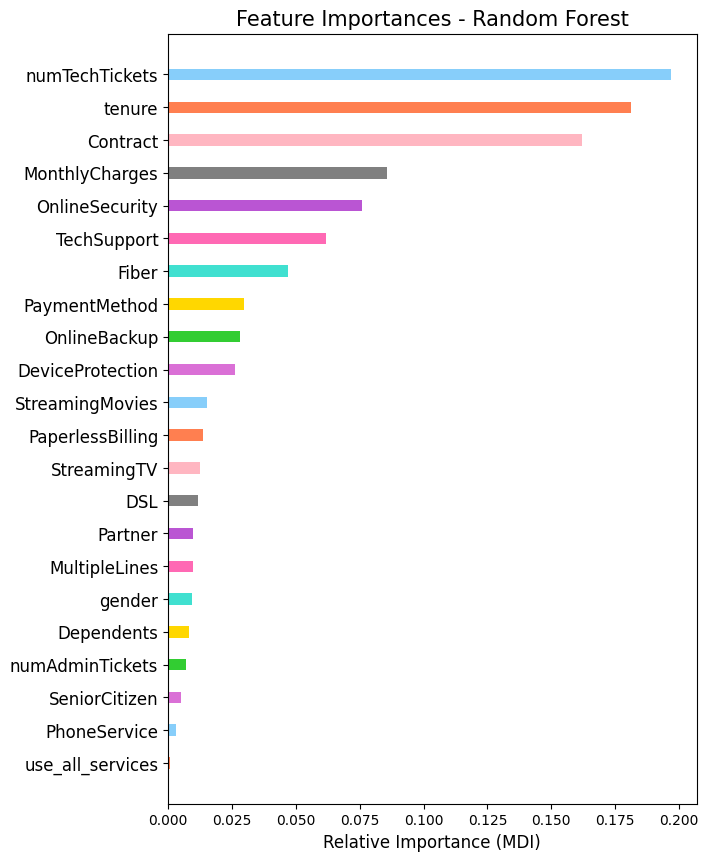

In [35]:

importances =  model.feature_importances_
indices = np.argsort(importances)  
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 2) 
plt.barh(X_train_scaled.columns, importances[indices], .35, color=colors, align='center')
plt.yticks(X_train_scaled.columns, X_train_scaled.columns[indices], fontsize=12)
plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances - Random Forest', fontsize=15)


### 6.7 LGBMClassifier의 하이퍼파라미터 튜닝 및 classification_report

In [36]:
# 불균형 데이터이기 때문에 파라미터에 'class_weight': 'balanced' 추가하였고, 교차검증은 StratifiedKFold을 사용함 
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'learning_rate': trial.suggest_uniform('learning_rate', 1e-4, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 1000),
        'class_weight': 'balanced',
        
    }
    model = lgb.LGBMClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train_scaled, y_train, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(f1_score, average='macro')).mean()
    return score

study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
study.optimize(objective, n_trials=10, show_progress_bar=True)
best_params = study.best_params
model = lgb.LGBMClassifier(**best_params, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


[I 2023-04-01 22:12:01,832] A new study created in memory with name: no-name-4d90e1cd-4414-4329-b903-4221e1d6913d


  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1036, number of negative: 2908
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      0.91      0.91      1539
         Yes       0.75      0.75      0.75       574

    accuracy                           0.86      2113
   macro avg       0.83      0.83      0.83      2113
weighted avg       0.86      0.86      0.86      2113



Text(0.5, 1.0, 'Feature Importances - LGBMClassifier')

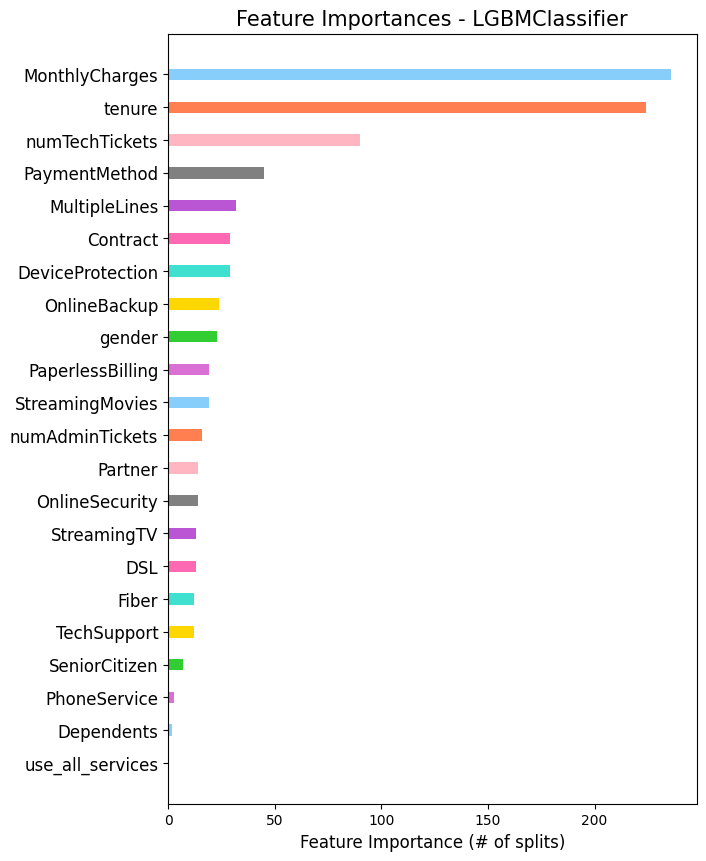

In [38]:

importances =  model.feature_importances_
indices = np.argsort(importances)  
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 2) 
plt.barh(X_train_scaled.columns, importances[indices], .35, color=colors, align='center')
plt.yticks(X_train_scaled.columns, X_train_scaled.columns[indices], fontsize=12)
plt.xlabel('Feature Importance (# of splits)', fontsize=12)
plt.title('Feature Importances - LGBMClassifier', fontsize=15)

### 6.8 최종 Feature 선택 및 모델 선택
- 모든 피처들의 경우의 수, 로지스틱회귀, 랜덤포레스트, LGBM을 바탕으로 중요한 Feature를 확인할 수 있었습니다.\
 또한 3가지의 모델 중에서 f1-score(불균형 데이터에 적합한 평가방법) 기준으로 가장 성능이 좋았던 LGBM을 통해 모델 학습을 진행합니다.

- Features : 'tenure','numTechTickets','MonthlyCharges'
- Model : LGBMClassifier


In [39]:
features=['tenure','numTechTickets','MonthlyCharges']

X_train_scaled2=X_train_scaled[features]
X_test_scaled2=X_test_scaled[features]
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'n_jobs': -1,
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'learning_rate': trial.suggest_uniform('learning_rate', 1e-4, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 1000),
        'class_weight': 'balanced',
        
    }
    model = lgb.LGBMClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train_scaled2, y_train, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(f1_score, average='macro')).mean()
    return score

study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
study.optimize(objective, n_trials=10, show_progress_bar=True)
best_params = study.best_params
model = lgb.LGBMClassifier(**best_params, random_state=42)
model.fit(X_train_scaled2, y_train)
y_pred_f3 = model.predict(X_test_scaled2)



[I 2023-04-01 22:13:06,984] A new study created in memory with name: no-name-c38e891b-097d-4904-bda4-8ccc885c356a


  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1036, number of negative: 2908
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 3944, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### 6.9 모델 평가결과 해석

In [125]:
print('모든 feature를 사용한 LGBM')
print(classification_report(y_test, y_pred))
print('-----------------------------------------------------')
print('3개의 feature를 사용한 LGBM')
print(classification_report(y_test, y_pred_f3))

모든 feature를 사용한 LGBM
              precision    recall  f1-score   support

          No       0.91      0.91      0.91      1539
         Yes       0.75      0.75      0.75       574

    accuracy                           0.86      2113
   macro avg       0.83      0.83      0.83      2113
weighted avg       0.86      0.86      0.86      2113

-----------------------------------------------------
3개의 feature를 사용한 LGBM
              precision    recall  f1-score   support

          No       0.90      0.91      0.90      1539
         Yes       0.75      0.72      0.73       574

    accuracy                           0.86      2113
   macro avg       0.82      0.82      0.82      2113
weighted avg       0.86      0.86      0.86      2113



#### [결과해석]
- precision : 모델이 이탈했다고 예측한 고객 중에서 실제로 이탈한 고객의 비율
- recall : 모델이 실제 이탈한 고객 중에서 이탈했다고 예측한 비율

- 불균형 데이터 이므로 f1-score를 바탕으로 평가했을 때 모든 feature를 사용한 모델과\
 3개의 feature를 사용한 모델과의 성능상으로 근소한 차이를 보입니다.\
 즉, 'tenure','numTechTickets','MonthlyCharges' 3개의 feature가 고객 이탈을 결정하는 핵심 변수로
 판단할 수 있습니다.

## 7. 고객세분화(K-means) 및 번들구성

### 7.1 고객 그룹 군집화(K-Means)

In [44]:


# 분석에 사용할 변수 추출(1차  연속형 변수 선택 후 범주형 변수 추가)
customer_df = df[[ 'tenure', 'MonthlyCharges',  'numTechTickets','PhoneService']]
customer_df = pd.get_dummies(customer_df, columns=[ 'PhoneService'])

print(customer_df.corr())


# 변수 표준화
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_df_scaled)
    silhouette_avg = silhouette_score(customer_df_scaled, kmeans.labels_)
    print(f"n_clusters: {i} / 실루엣 계수:{silhouette_avg}")
    
    
# 군집화 수행
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(customer_df_scaled)

# 고객 클러스터링 결과를 DataFrame에 추가
df['cluster'] = kmeans.labels_

                    tenure  MonthlyCharges  numTechTickets  PhoneService_No  \
tenure            1.000000        0.247900        0.215158        -0.008448   
MonthlyCharges    0.247900        1.000000        0.245081        -0.247398   
numTechTickets    0.215158        0.245081        1.000000        -0.018107   
PhoneService_No  -0.008448       -0.247398       -0.018107         1.000000   
PhoneService_Yes  0.008448        0.247398        0.018107        -1.000000   

                  PhoneService_Yes  
tenure                    0.008448  
MonthlyCharges            0.247398  
numTechTickets            0.018107  
PhoneService_No          -1.000000  
PhoneService_Yes          1.000000  
n_clusters: 2 / 실루엣 계수:0.609215068655162
n_clusters: 3 / 실루엣 계수:0.396927027136979
n_clusters: 4 / 실루엣 계수:0.4343093233762864
n_clusters: 5 / 실루엣 계수:0.4827529687556649
n_clusters: 6 / 실루엣 계수:0.48817398353490826
n_clusters: 7 / 실루엣 계수:0.4931571646786083
n_clusters: 8 / 실루엣 계수:0.4758289760182594
n_clusters

- 군집화에 사용하는 변수의 경우 연속형 변수가 적합하기에 'tenure', 'MonthlyCharges',  'numTechTickets'\
    3개의 변수를 처음 할당하였고, 이후 범주형 변수를 추가하면서 실루엣 계수(-1~ 1)가 높은 조합을 반복적으로 실험했습니다.
- n_clusters의 값이 2인 경우 실루엣 계수가 0.609로 가장 높은 점수가 나왔기에 2로 설정합니다.
####

### 7.2 요약통계 및 시각화를 통한 cluster0(0그룹), cluster1(1그룹) 비교분석



In [53]:


# 이탈 고객 중에서 클러스터 0에 속하는 고객 추출
cluster0 = df[df['cluster']==0]
cluster0_services = cluster0[['PhoneService', 'MultipleLines', 'DSL','Fiber', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
cluster0_services[['DSL','Fiber']]=cluster0_services[['DSL','Fiber']].astype('str')
print(cluster0.describe())

       SeniorCitizen       tenure     Contract  MonthlyCharges  TotalCharges  \
count    6361.000000  6361.000000  6361.000000     6361.000000   6361.000000   
mean        0.163182    32.439082     8.843106       67.199041   2363.759432   
std         0.369561    24.595120     9.556859       30.449604   2328.880553   
min         0.000000     0.000000     1.000000       18.250000      0.000000   
25%         0.000000     9.000000     1.000000       44.750000    413.000000   
50%         0.000000    29.000000     1.000000       74.700000   1417.900000   
75%         0.000000    56.000000    12.000000       91.250000   4024.200000   
max         1.000000    72.000000    24.000000      118.750000   8684.800000   

       numAdminTickets  numTechTickets  use_all_services  total_charges  \
count      6361.000000     6361.000000       6361.000000    6361.000000   
mean          0.512655        0.426977          0.032699    2363.620979   
std           1.271929        1.262443          0.1778

In [54]:
churn_df = df[df['Churn']=='Yes']
cluster1 = df[df['cluster']==1]
cluster1_services = cluster1[['PhoneService', 'MultipleLines', 'DSL','Fiber',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
cluster1_services[['DSL','Fiber']]=cluster1_services[['DSL','Fiber']].astype('str')
print(cluster1.describe())


       SeniorCitizen      tenure    Contract  MonthlyCharges  TotalCharges  \
count     682.000000  682.000000  682.000000      682.000000    682.000000   
mean        0.152493   31.737537    8.768328       42.028592   1496.033651   
std         0.359762   24.233204    9.507505       11.419585   1341.690864   
min         0.000000    0.000000    1.000000       23.450000      0.000000   
25%         0.000000    8.000000    1.000000       33.600000    298.512500   
50%         0.000000   29.000000    1.000000       40.575000   1149.025000   
75%         0.000000   53.000000   12.000000       50.737500   2458.587500   
max         1.000000   72.000000   24.000000       67.200000   4919.700000   

       numAdminTickets  numTechTickets  use_all_services  total_charges  \
count       682.000000      682.000000             682.0     682.000000   
mean          0.543988        0.350440               0.0    1495.745455   
std           1.306923        1.127187               0.0    1338.155510 

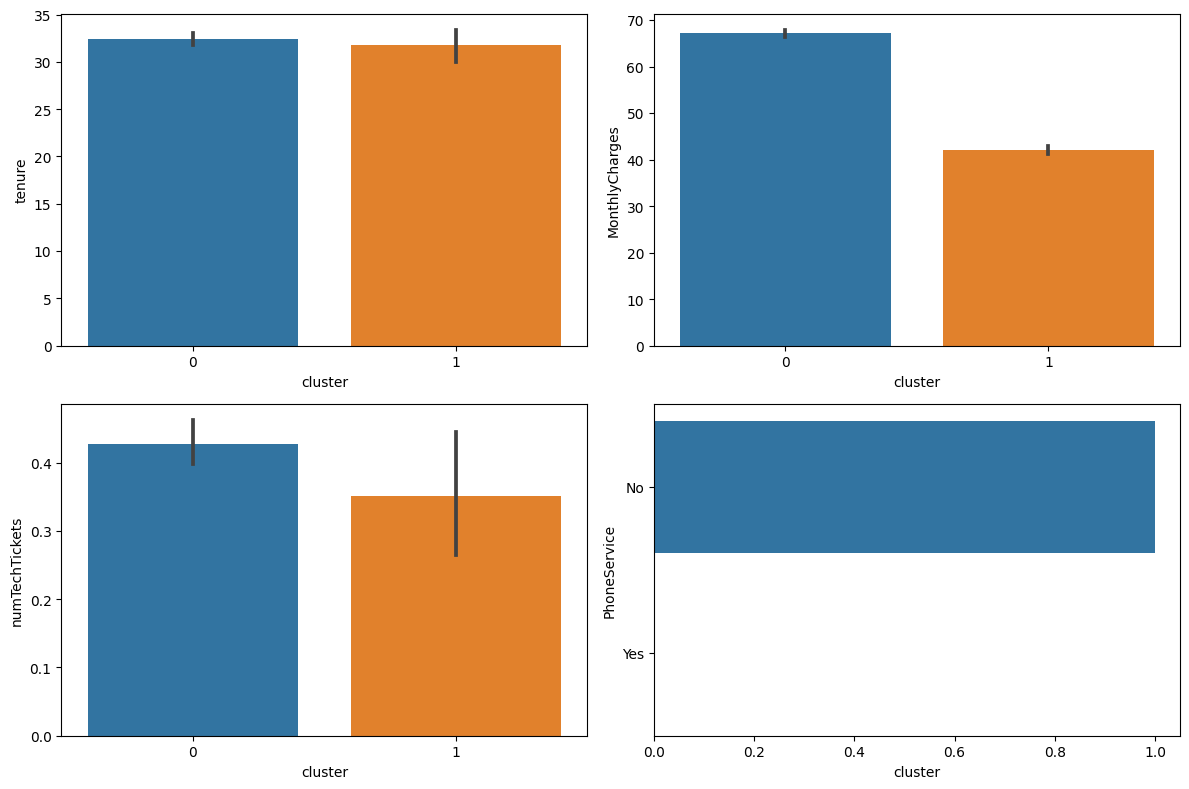

In [55]:
columns = ['tenure', 'MonthlyCharges', 'numTechTickets', 'PhoneService']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for idx, col in enumerate(columns):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.barplot(x="cluster", y=col, data=df, ax=axes[row_idx, col_idx])

plt.tight_layout()
plt.show()


#### [비교분석]
- 0그룹의 특징은 DSL과 Fiber(비싸지만 속도가 빠름) 중에서 Fiber를 선호하는 편이며,\
사용월(tenure)은 1그룹보다 0.7월 정도 길며, 월별요금(MonthlyCharges)은 67로 1그룹의 42보다 25정도 큽니다. \
기술티켓(numTechTickets)은 0.07개 정도 많고, 전화서비스(PhoneService)의 경우 그룹 전원이 사용중입니다.

- 1그룹의 경우 인터넷서비스 중에서는 DSL만 사용하고, 그룹 전원이 PhoneService를 사용하지 않습니다.
####

### 7.3 번들 구성

In [56]:
cluster0_services.describe()

,PhoneService,MultipleLines,DSL,Fiber,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361
unique,1,2,2,2,3,3,3,3,3,3
top,Yes,No,0,0,No,No,No,No,Yes,Yes
freq,6361,3390,4622,3265,3099,2693,2718,3080,2422,2434


In [57]:
cluster1_services.describe()

,PhoneService,MultipleLines,DSL,Fiber,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,682,682,682,682,682,682,682,682,682,682
unique,1,1,1,1,2,2,2,2,2,2
top,No,No phone service,1,0,No,No,No,No,No,No
freq,682,682,682,682,399,395,377,393,397,384


In [80]:
print('>>> 0그룹')
group0_ratio=(cluster0_services.describe().loc['freq']/len(cluster0_services)).sort_values(ascending=False)
group0_ratio=group0_ratio.drop('Fiber')  
print(group0_ratio)
print('==============================')
print('>>> 1그룹')
group1_ratio=(cluster1_services.describe().loc['freq']/len(cluster1_services)).sort_values(ascending=False)
group1_ratio=group1_ratio.drop('Fiber')       
print(group1_ratio)

>>> 0그룹
PhoneService             1.0
DSL                 0.726615
MultipleLines       0.532935
OnlineSecurity      0.487188
TechSupport         0.484201
DeviceProtection    0.427291
OnlineBackup        0.423361
StreamingMovies     0.382644
StreamingTV         0.380758
Name: freq, dtype: object
>>> 1그룹
PhoneService             1.0
MultipleLines            1.0
DSL                      1.0
OnlineSecurity      0.585044
StreamingTV         0.582111
OnlineBackup        0.579179
TechSupport         0.576246
StreamingMovies      0.56305
DeviceProtection    0.552786
Name: freq, dtype: object


- 번들을 구성하기 위해서 각 그룹별 서비스의 통계정보를 바탕으로 가장 많이 사용하는 서비스들을 정렬하고 비율로 표시합니다

In [87]:

# 서비스별 가격 딕셔너리
price_dict={'PhoneService': phone_service_price,
            'MultipleLines': multiple_lines_price,
            'Fiber': fiber_price,
            'DSL': dsl_price,
            'OnlineSecurity': online_security_price,
            'OnlineBackup': online_backup_price,
            'DeviceProtection': device_protection_price,
            'TechSupport': tech_support_price,
            'StreamingTV': streaming_tv_price,
            'StreamingMovies': streaming_movies_price}


# 0그룹의 번들상품 구성과 가격
bundle0 = ['PhoneService']
prices0 = phone_service_price
for service in group0_ratio.index:
    if service == ['Fiber']:
        continue
    if prices0 + price_dict[service] < 60:
        if service == 'PhoneService':
            continue


        else:
            bundle0.append(service)
            prices0 += price_dict[service]
    else:
        break
   
# 1그룹의 번들상품 구성과 가격            
bundle1 = ['DSL']
prices1 = dsl_price
for service in group1_ratio.index:
    if service == 'Fiber':
        continue

    if prices1 + price_dict[service] < 60:

        if service == 'DSL':
            continue
        elif service == 'PhoneService':
            continue
        elif service == 'MultipleLines':
            continue
        else:
            bundle1.append(service)
            prices1 += price_dict[service]
   
    else:
        break


In [119]:
print('1그룹')
print(f'bundle0 : {bundle0}')
print(f'prices0 : {prices0}')
print('=====================================================================================')
print('2그룹')
print(f'bundle1 : {bundle1}')
print(f'prices1 : {prices1}')


1그룹
bundle0 : ['PhoneService', 'DSL', 'MultipleLines', 'OnlineSecurity', 'TechSupport']
prices0 : 59.85835213032581
2그룹
bundle1 : ['DSL', 'OnlineSecurity', 'StreamingTV', 'OnlineBackup', 'TechSupport', 'StreamingMovies']
prices1 : 59.23833333333332


- '5.1 통신사에서 제공하는 서비스별 가격 계산'에서 계산한 각 서비스별 금액을 바탕으로 0그룹과 1그룹의 번들 리스트를 구성하고 가격을 계산합니다. \
가격의 기준이되는 60의 값은 '4.4 월별 요금분포'의 시각화 자료를 바탕으로 60를 이상일 때 \
이탈하는 사람이 많아지는 것을 보고 60 미만의 금액으로 서비스들을 구성하기 위해 코드를 작성하였습니다.


### 7.4 번들 상품 제안을 통한 기대효과

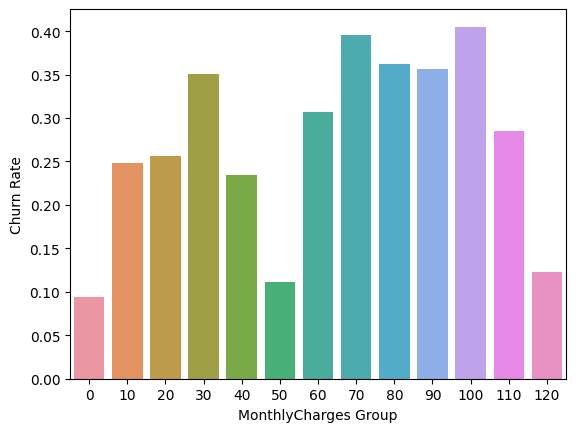

In [122]:
df = pd.read_excel('Telecom Churn Rate Dataset.xlsx')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 월별 요금을 13단계로 분류
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=13, labels=range(0,130,10))

# 각 요금 그룹별 이탈율 계산
churn_rate_by_monthly_charges = df.groupby('MonthlyCharges_group')['Churn'].mean()

# 시각화
sns.barplot(x=churn_rate_by_monthly_charges.index, y=churn_rate_by_monthly_charges.values)
plt.xlabel('MonthlyCharges Group')
plt.ylabel('Churn Rate')
plt.show()

In [123]:
cluster0_services['Fiber'] = cluster0_services['Fiber'].astype(int)
cluster0_services['DSL'] = cluster0_services['DSL'].astype(int)

# 0그룹 계산(보수적으로 Fiber 사용자는 제외하고 DSL 사용자만 번들상품 제안 수락시)
DSL사용자0=cluster0['DSL'].sum()
기존_월별요금0 = cluster0.describe()['MonthlyCharges']['mean']
번들_월별요금0 = prices0
기존_이탈율0 = 0.306452 # churn_rate_by_monthly_charges : 70~79 구간
번들_이탈율0 = 0.111111 # churn_rate_by_monthly_charges : 50~59 구간

기존매출금액0 = 기존_월별요금0 * DSL사용자0 * (1 - 기존_이탈율0)
번들매출금액0 = 번들_월별요금0 * DSL사용자0 * (1 - 번들_이탈율0)
증분매출금액0 = round((번들매출금액0 - 기존매출금액0))
증분매출금액0

11480

In [124]:
# 1그룹 계산(전제 사용자가 번들상품 제안 수락시)
DSL사용자1=cluster1['DSL'].sum()
기존_월별요금1 = cluster1.describe()['MonthlyCharges']['mean']
번들_월별요금1 = prices1
기존_이탈율1 = 0.234982 # churn_rate_by_monthly_charges : 30~39 구간
번들_이탈율1 = 0.111111 # churn_rate_by_monthly_charges : 50~59 구간

기존매출금액1 = 기존_월별요금1 * DSL사용자1 * (1 - 기존_이탈율1)
번들매출금액1 = 번들_월별요금1 * DSL사용자1 * (1 - 번들_이탈율1)
증분매출금액1 = round((번들매출금액1 - 기존매출금액1))
증분매출금액1

13984


- 0그룹의 경우 번들 구성은 'PhoneService', 'DSL', 'MultipleLines', 'OnlineSecurity', 'TechSupport' 이고, 가격은 59.8입니다.\
 0그룹은 약 6361명 중에서 전화서비스는 전부 사용하고 인터넷 서비스의 경우 3265명은 Fiber, 1739	명은 DSL 을 사용합니다.\
  Fiber의 경우 가격이 약 50 정도이다보니 전화서비스 가격 20을 더하면 70으로 이미 60을 초과하여 번들상품을 구성하기에 적합하지 않습니다. \
  때문에 전화서비스를 사용하고 DSL 인터넷서비스를 사용하는 1739명의 고객들을 대상으로 번들상품을 구성하고 추천할 수 있습니다.\
  그리고 인터넷 서비스로 Fiber를 사용하는 고객들의 경우 이탈하는 수가 많기 때문에 DSL로의 변경을 제안하면서 번들상품을 제시할 수도 있습니다.\
  보수적인 관점에서 Fiber사용자들을 제외하고 DSL 사용자만을 대상으로 위의 번들 상품을 제안하고 모든 사용자들이 제안을 수락한다는 가정하에 증분 이익을 계산할 수 있습니다.
  기존 월별요금은 67에서 59로 감소하게 되지만 이탈율의 감소가 더 크기 때문에 회사의 매출은 11,480 만큼 증가하게 됩니다.

- 1그룹의 경우 번들 구성은 'DSL', 'OnlineSecurity', 'StreamingTV', 'OnlineBackup', 'TechSupport', 'StreamingMovies' 이며 가격은 약 59입니다. \
1그룹은 전화서비스를 사용하지 않는 그룹이고 인터넷서비스는 DSL을 사용하기 때문에 1그룹 보다 더욱 많은 구성으로 번들상품을 기획할 수 있습니다. 
기존 월별요금인 42에서 55로 증가하고 이탈율은 오히려 감소하기에 그룹0과 마찬가지로 회사의 매출은 13,984만큼 증가하게 됩니다.


## 8. 분석 결론



- 분석 목적은 고객들의 이탈 가능성을 예측하고 맞춤형 서비스를 제공하여 고객 이탈율을 낮추는 것입니다.\
 이를 위해서 고객들을 세분화하고, 번들 판매를 분석하여 고객 입장에서는 조금 더 만족스러운 서비스를 제공 받으며,\
 회사 입장에서는 회사의 이익을 극대화하는 것을 목표로 합니다.

- 분석과정에서는 데이터 전처리, EDA, 개별 서비스가격 계산, 모델링, 고객세분화, 번들구성 등을 수행했습니다.

- 분석 결과, EDA를 진행하면서 변수 간의 상관관계를 확인하고 Churn에 영향을 미치는 변수를 탐색하였고,\
 특히 MonthlyCharges의 경우 시각화를 통해서 월별요금이 60을 초과하였을 경우에 이탈율이 급격히 높아지는 것을 확인 할 수 있었습니다.\
  그리고 모델링의 경우  로지스틱회귀, 랜덤포레스트, LightGBM 모델링 이후 카운팅, coef, feature_importance 등을 통해서 \
  Churn에 핵심적인 변수가 'tenure','numTechTickets','MonthlyCharges' 3가지 임을 확인 할 수 있었습니다. \
  고객 그룹은 K-Means 알고리즘을 통해서 2개의 그룹으로 분류하였고, 'tenure', 'MonthlyCharges', 'numTechTickets','PhoneService' \
  4개의 변수가 분류하는데 핵심 변수로 설정됐습니다. 이후 2개의 그룹에 어울리는 번들구성을 찾아서 새롭게 작성된 번들상품 제안을 통해서 \
  회사의 매출이 월단위로 11,480(그룹0)+13,984(그룹1) 만큼 상승할 수 있음을 확인할 수 있었습니다.

